In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Obesity Classification.csv")
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [6]:
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [9]:
df.drop('ID',axis = 1,inplace = True)

In [10]:
df

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...
103,11,Male,175,10,3.9,Underweight
104,16,Female,160,10,3.9,Underweight
105,21,Male,180,15,5.6,Underweight
106,26,Female,150,15,5.6,Underweight


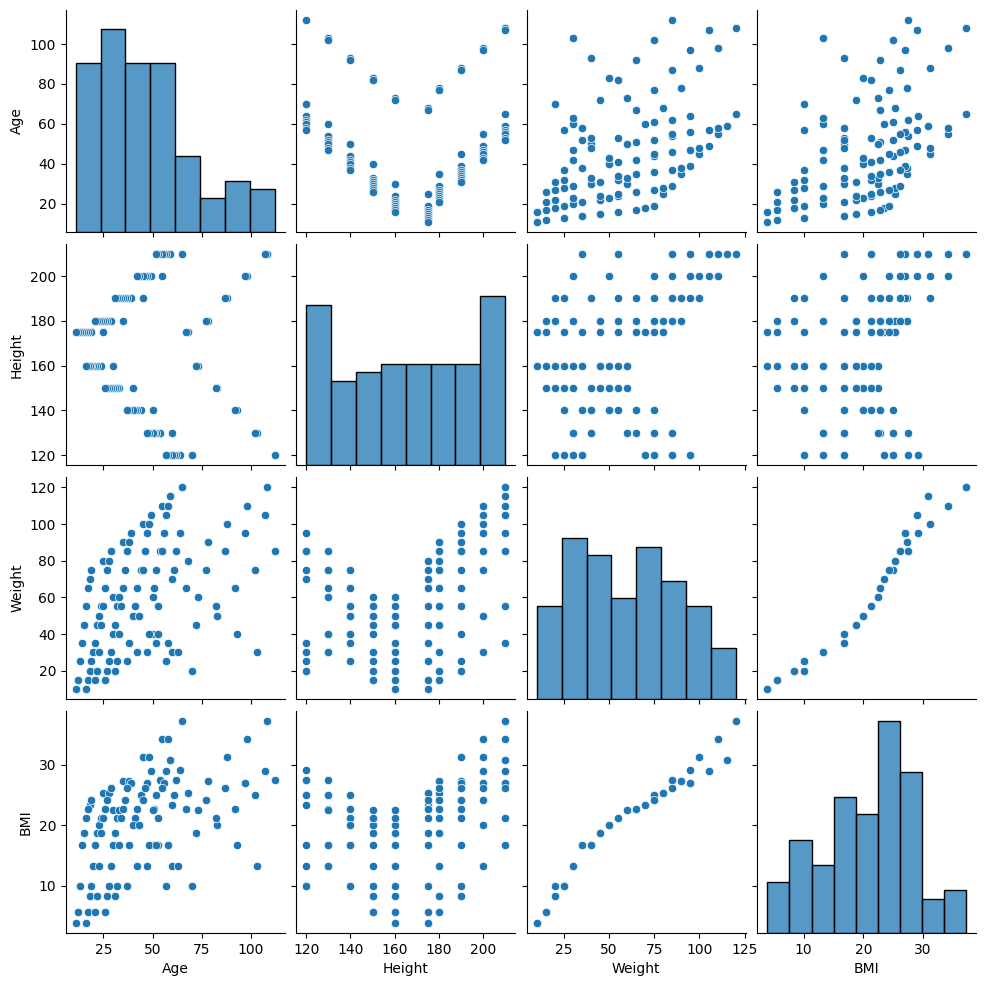

In [11]:
sns.pairplot(df)

<Axes: xlabel='Label', ylabel='count'>

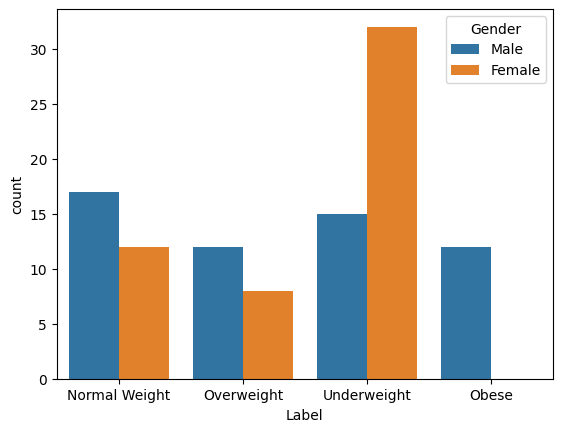

In [15]:
sns.countplot(x = df['Label'],hue = df['Gender'])

<Axes: ylabel='BMI'>

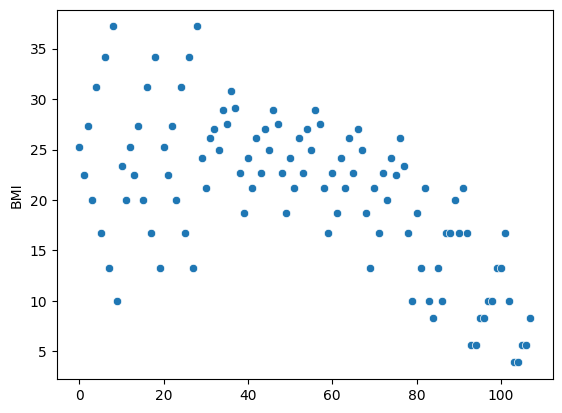

In [20]:
sns.scatterplot(df['BMI'])

C:\Users\Anil kumar\AppData\Local\Temp\ipykernel_10140\2575271789.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'],bins = 60,color='darkred')


<Axes: xlabel='BMI', ylabel='Density'>

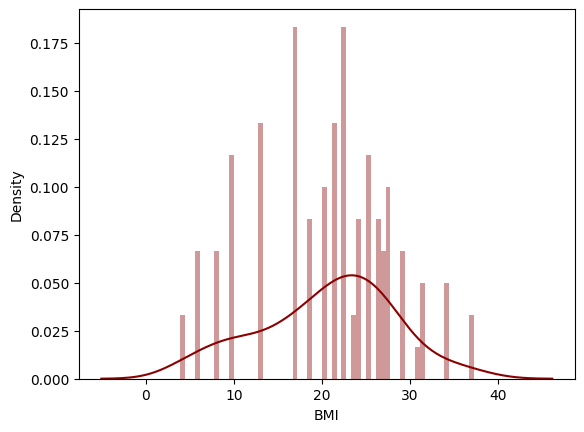

In [25]:
sns.distplot(df['BMI'],bins = 60,color='darkred')

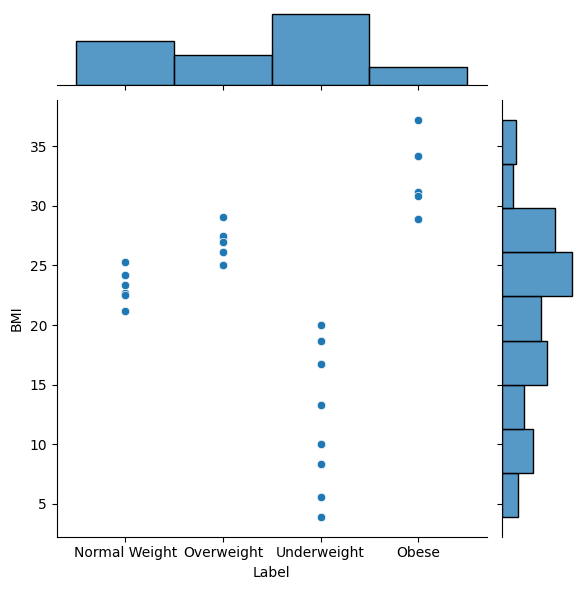

In [27]:
sns.jointplot(y = 'BMI', x = 'Label',data = df)

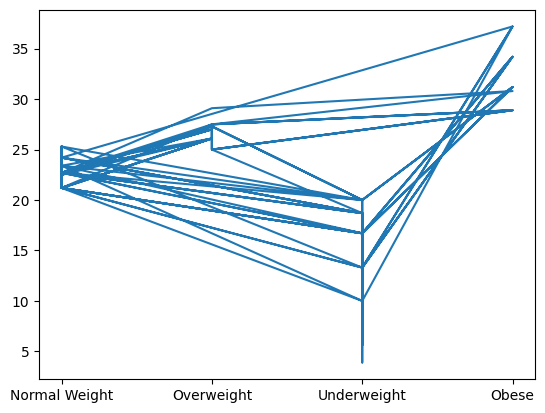

In [29]:
plt.plot( df['Label'], df['BMI'])

<Axes: xlabel='Age', ylabel='Count'>

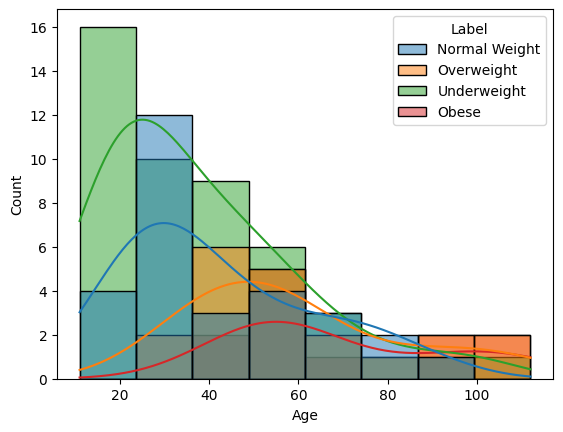

In [62]:
sns.histplot(x=df['Age'],hue = df['Label'],kde=True)
# sns.histplot(data=df , x = 'Age' , hue = 'Label' , kde=True ,palette='Set1' )

<Axes: >

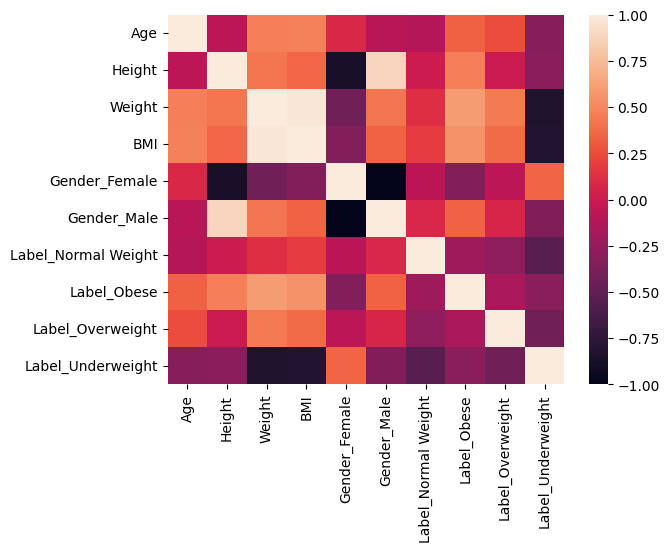

In [83]:
sns.heatmap(pd.get_dummies(df).corr())

In [3]:
X = df.drop('Label',axis = 1)
X = pd.get_dummies(X)
y = df['Label']

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 0)

## Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
model = log_model.fit(X_train,y_train)
y_pred = model.predict(X_test)

C:\Users\Anil kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[4, 0, 0, 0],
       [0, 2, 1, 0],
       [2, 2, 2, 0],
       [1, 0, 0, 8]], dtype=int64)

In [7]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

Normal Weight       0.57      1.00      0.73         4
        Obese       0.50      0.67      0.57         3
   Overweight       0.67      0.33      0.44         6
  Underweight       1.00      0.89      0.94         9

     accuracy                           0.73        22
    macro avg       0.68      0.72      0.67        22
 weighted avg       0.76      0.73      0.72        22



In [8]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7272727272727273


#### RANDOM FOREST CLASSIFIER

In [9]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
model2 = classifier.fit(X_train,y_train)
pred = model2.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [11]:
confusion_matrix(y_test,pred)

array([[4, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 6, 0],
       [0, 0, 0, 9]], dtype=int64)

In [12]:
print(classification_report(y_test,pred))

               precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00         4
        Obese       1.00      1.00      1.00         3
   Overweight       1.00      1.00      1.00         6
  Underweight       1.00      1.00      1.00         9

     accuracy                           1.00        22
    macro avg       1.00      1.00      1.00        22
 weighted avg       1.00      1.00      1.00        22



# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(X_train,y_train)
predictions = model3.predict(X_test)

In [18]:
print(confusion_matrix(y_test,predictions))

[[4 0 0 0]
 [0 3 0 0]
 [0 0 6 0]
 [0 0 0 9]]


In [19]:
print(classification_report(y_test,pred))

               precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00         4
        Obese       1.00      1.00      1.00         3
   Overweight       1.00      1.00      1.00         6
  Underweight       1.00      1.00      1.00         9

     accuracy                           1.00        22
    macro avg       1.00      1.00      1.00        22
 weighted avg       1.00      1.00      1.00        22



## SVM

In [23]:
from sklearn.svm import SVC
model4 = SVC()
model4.fit(X_train,y_train)
pred2 = model4.predict(X_test)
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

[[3 0 0 1]
 [0 3 0 0]
 [5 1 0 0]
 [0 0 0 9]]
               precision    recall  f1-score   support

Normal Weight       0.38      0.75      0.50         4
        Obese       0.75      1.00      0.86         3
   Overweight       0.00      0.00      0.00         6
  Underweight       0.90      1.00      0.95         9

     accuracy                           0.68        22
    macro avg       0.51      0.69      0.58        22
 weighted avg       0.54      0.68      0.60        22



C:\Users\Anil kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anil kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anil kumar\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier()
model5.fit(X_train,y_train)
pred3 = model5.predict(X_test)
print(confusion_matrix(y_test,pred3))
print(classification_report(y_test,pred3))

[[3 0 0 1]
 [0 3 0 0]
 [4 1 1 0]
 [0 0 0 9]]
               precision    recall  f1-score   support

Normal Weight       0.43      0.75      0.55         4
        Obese       0.75      1.00      0.86         3
   Overweight       1.00      0.17      0.29         6
  Underweight       0.90      1.00      0.95         9

     accuracy                           0.73        22
    macro avg       0.77      0.73      0.66        22
 weighted avg       0.82      0.73      0.68        22



# Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
model6 = GaussianNB()
model6.fit(X_train,y_train)
pred4 = model6.predict(X_test)
print(confusion_matrix(y_test,pred4))
print(classification_report(y_test,pred4))

[[4 0 0 0]
 [0 3 0 0]
 [0 5 1 0]
 [0 0 0 9]]
               precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00         4
        Obese       0.38      1.00      0.55         3
   Overweight       1.00      0.17      0.29         6
  Underweight       1.00      1.00      1.00         9

     accuracy                           0.77        22
    macro avg       0.84      0.79      0.71        22
 weighted avg       0.91      0.77      0.74        22



### So the best model is of RandomForest and DecisionTree